In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pingouin as pg
sns.set_style("whitegrid")

In [6]:
df= pg.read_dataset("rm_anova2").filter(["Metric", "Performance"])
df

,Metric,Performance
0,Product,13
1,Product,12
2,Product,17
3,Product,12
4,Product,19
5,Product,6
6,Product,17
7,Product,18
8,Product,23
9,Product,18


In [7]:
df["Metric"].value_counts()

Metric
Product    20
Client     20
Action     20
Name: count, dtype: int64

In [9]:
pg.normality(data=df, dv="Performance", group="Metric", alpha=0.05)

,W,pval,normal
Metric,,,
Product,0.886347,0.023054,False
Client,0.935938,0.200725,True
Action,0.955717,0.462202,True


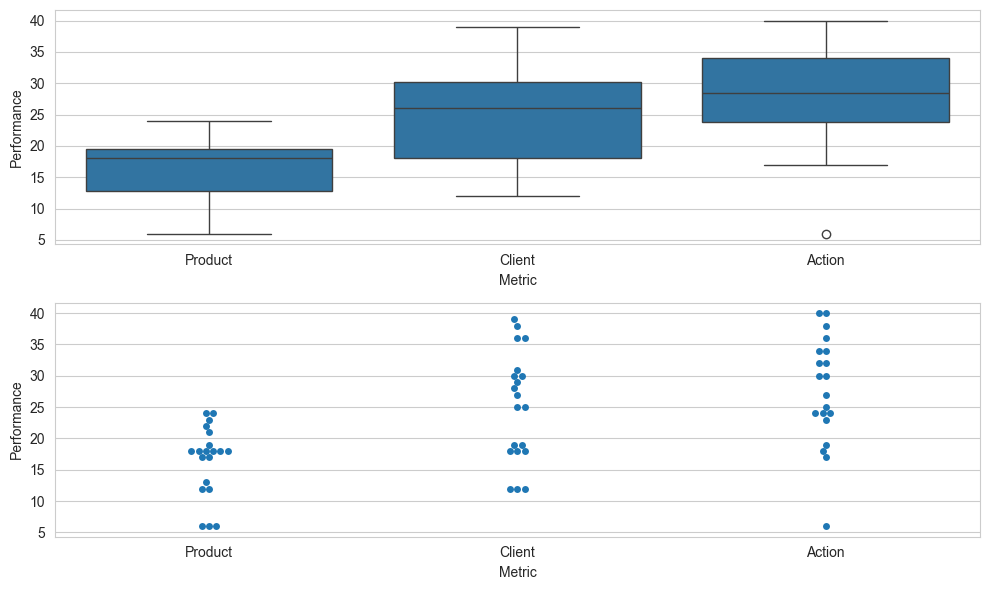

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
sns.boxplot(data=df, x= "Metric", y="Performance", ax=axes[0])
sns.swarmplot(data=df, x= "Metric", y="Performance", ax=axes[1])
plt.tight_layout()
plt.show()

In [16]:
pg.kruskal(data=df, dv="Performance", between="Metric")

,Source,ddof1,H,p-unc
Kruskal,Metric,2,17.914541,0.000129


p-unc is lesser than 0.05, so we reject the null hypothesis that the differences are random, there is a statictical relationship between Metric and Performance.